Época [1000/25000], Loss: 0.042839
Época [2000/25000], Loss: 0.010838
Época [3000/25000], Loss: 0.007777
Época [4000/25000], Loss: 0.007148
Época [5000/25000], Loss: 0.006781
Época [6000/25000], Loss: 0.006503
Época [7000/25000], Loss: 0.006804
Época [8000/25000], Loss: 0.006235
Época [9000/25000], Loss: 0.006295
Época [10000/25000], Loss: 0.006136
Época [11000/25000], Loss: 0.006085
Época [12000/25000], Loss: 0.006398
Época [13000/25000], Loss: 0.005952
Época [14000/25000], Loss: 0.006094
Época [15000/25000], Loss: 0.006074
Época [16000/25000], Loss: 0.005850
Época [17000/25000], Loss: 0.005889
Época [18000/25000], Loss: 0.005842
Época [19000/25000], Loss: 0.006835
Época [20000/25000], Loss: 0.006172
Época [21000/25000], Loss: 0.005710
Época [22000/25000], Loss: 0.005641
Época [23000/25000], Loss: 0.005827
Época [24000/25000], Loss: 0.006072
Época [25000/25000], Loss: 0.005600
Mean Squared Error on Test Data: 2.5516561081029367


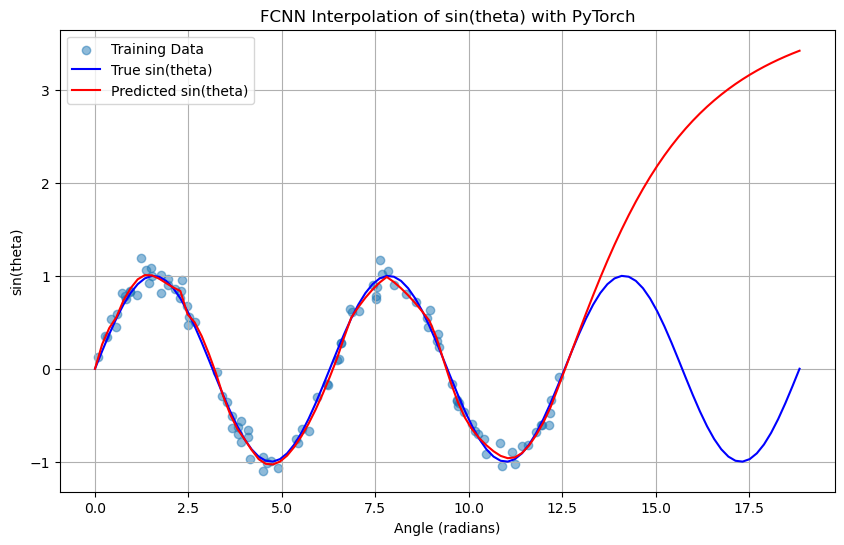

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. Gerar os dados de treino
np.random.seed(42)
torch.manual_seed(42)

num_samples = 100
angles_train_np = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1)
sin_values_train_np = np.sin(angles_train_np)
noise = np.random.normal(0, 0.1, sin_values_train_np.shape)
sin_values_train_np += noise

# Converter os dados para tensores PyTorch
angles_train = torch.tensor(angles_train_np, dtype=torch.float32)
sin_values_train = torch.tensor(sin_values_train_np, dtype=torch.float32)

# 2. Definir a rede neural totalmente conectada (FCNN)
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 15),
            nn.Tanh(),
            nn.Linear(15, 15),
            nn.SELU(),
            nn.Linear(15, 15),
            nn.Tanh(),
            nn.Linear(15, 1)
        )

    def forward(self, x):
        return self.net(x)

# Instanciar o modelo
model = FCNN()

# Definir a função de perda e o otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Treinar o modelo
num_epochs = 25000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(angles_train)
    loss = criterion(outputs, sin_values_train)
    loss.backward()
    optimizer.step()

    # (Opcional) imprimir a perda a cada 1000 iterações
    if (epoch+1) % 1000 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# 4. Gerar dados de teste
num_test_samples = 100
angles_test_np = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true_np = np.sin(angles_test_np)

angles_test = torch.tensor(angles_test_np, dtype=torch.float32)

# 5. Fazer previsões
model.eval()
with torch.no_grad():
    sin_values_predicted = model(angles_test).numpy()

# 6. Avaliar o modelo
mse = np.mean((sin_values_true_np - sin_values_predicted)**2)
print(f"Mean Squared Error on Test Data: {mse}")

# 7. Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(angles_train_np, sin_values_train_np, label='Training Data', alpha=0.5)
plt.plot(angles_test_np, sin_values_true_np, label='True sin(theta)', color='blue')
plt.plot(angles_test_np, sin_values_predicted, label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta) with PyTorch')
plt.legend()
plt.grid(True)
plt.show()
